In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [354]:
from collections import Counter

In [393]:
df = pd.read_csv('8_22_1_result.csv')

In [394]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [395]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [396]:
ETE3_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
ETE3_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
ETE3_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
concat_ETE3 = pd.concat([ETE3_Duplication,ETE3_Loss],axis=1)

In [397]:
print(len(True_Duplication))

86


In [398]:
print(len(O_Duplication))

86


In [399]:
print(len(ETE3_Duplication))

86


In [401]:
True_Duplication['Replicate']=[i for i in range(86)]
O_Duplication['Replicate']=[i for i in range(86)]
ETE3_Duplication['Replicate']=[i for i in range(86)]


In [402]:
true_reconils_dups= pd.DataFrame(concat_true-concat_O)
val =['reconcILS' for i in range(86)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [403]:
true_ete3_dups= pd.DataFrame((concat_true-concat_ETE3))
val =['DLCpar' for i in range(86)]
true_ete3_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [404]:
true_reconils_dups

,Duplication,Loss,Algorithm
0,1,1,reconcILS
1,0,0,reconcILS
2,2,2,reconcILS
3,0,0,reconcILS
4,1,1,reconcILS
...,...,...,...
81,1,1,reconcILS
82,1,1,reconcILS
83,0,0,reconcILS
84,1,1,reconcILS


In [405]:
true_ete3_dups

,Duplication,Loss,Algorithm
0,1,1,DLCpar
1,0,0,DLCpar
2,2,3,DLCpar
3,0,1,DLCpar
4,2,2,DLCpar
...,...,...,...
81,1,1,DLCpar
82,1,1,DLCpar
83,0,0,DLCpar
84,1,1,DLCpar


In [406]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [407]:
val

29

In [408]:
new =pd.concat([true_reconils_dups,true_ete3_dups],axis=0)
pd.melt(new, id_vars =['Algorithm'])

,Algorithm,variable,value
0,reconcILS,Duplication,1
1,reconcILS,Duplication,0
2,reconcILS,Duplication,2
3,reconcILS,Duplication,0
4,reconcILS,Duplication,1
...,...,...,...
339,DLCpar,Loss,1
340,DLCpar,Loss,1
341,DLCpar,Loss,0
342,DLCpar,Loss,1


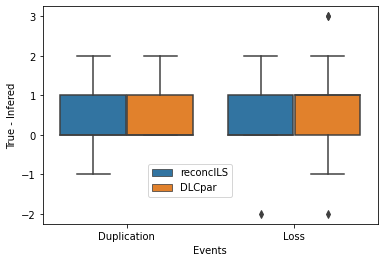

In [409]:
ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.3,0.3))
plt.ylabel("True - Infered")
plt.savefig('box_plot.png', dpi=500)


In [410]:
true_ete3_dups

,Duplication,Loss,Algorithm
0,1,1,DLCpar
1,0,0,DLCpar
2,2,3,DLCpar
3,0,1,DLCpar
4,2,2,DLCpar
...,...,...,...
81,1,1,DLCpar
82,1,1,DLCpar
83,0,0,DLCpar
84,1,1,DLCpar


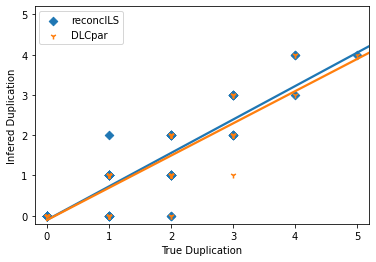

<Figure size 432x288 with 0 Axes>

In [411]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)

result12 =pd.concat([True_Duplication['Duplication'],ETE3_Duplication['Duplication']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="D", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')
#ax=sns.regplot(x=list(range(98)), y=list(range(98)), data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='ETE3')



plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups.png', dpi=500)

plt.show()
plt.clf()

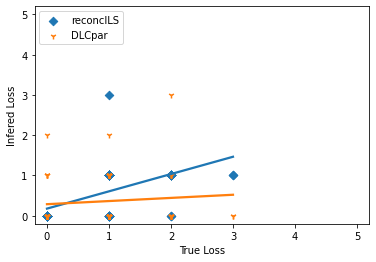

<Figure size 432x288 with 0 Axes>

In [412]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)

result12 =pd.concat([TRUE_Loss['Loss'],ETE3_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="D", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss.png', dpi=500)

plt.show()
plt.clf()

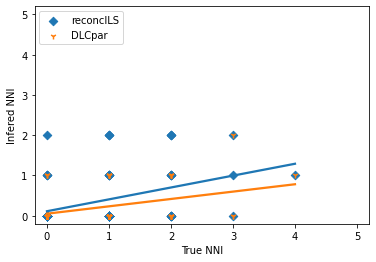

<Figure size 432x288 with 0 Axes>

In [413]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)

result12 =pd.concat([TRUE_NNI['NNI'],ETE3_NNI['NNI']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="D", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True NNI")
plt.ylabel("Infered NNI")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI.png', dpi=500)

plt.show()
plt.clf()

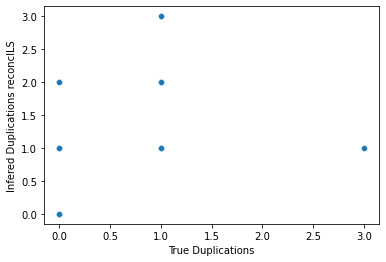

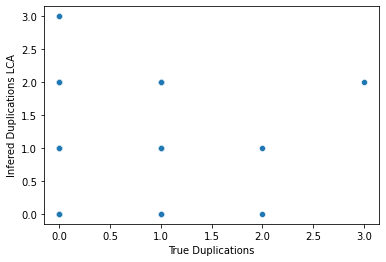

In [414]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

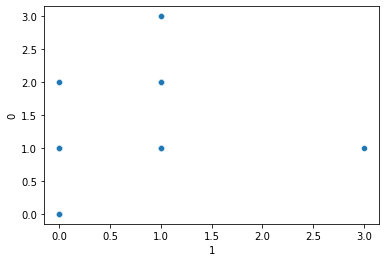

In [415]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [422]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['NNI']))

In [423]:
rho

0.11008923064064378

In [424]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['NNI']))

In [425]:
rho

0.664907561997481

In [426]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['NNI']))

In [427]:
rho

0.8760157606349658

In [428]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['NNI']))

In [429]:
rho

0.8784062800285037

In [430]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI']))

In [431]:
rho

0.31991734803514504

In [432]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI']))

In [433]:
rho

0.40379757421287094